# Bloch Equation Simulation 
### An implementation of Bloch equations that describes the behaviour of the bulk magnetization 

Main importations

In [1]:
import bloch as b  # a Class which is implemented in it`s own module 
import numpy as np
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

##### instantation of the main class responsible for the calculations needed and printing the accopanied doc string 
###### the file can be tracked here [Bloch](bloch.py)

In [2]:
m = b.magentization(900*10**-3, 50*10**-3, 1.5)
print(b.magentization.__doc__)


    Responsible for calculating the magnetization vector.
    Implements the following:
    * calculate the magnetization vector after application of Mo [0 0 Mo]
    * Returns the vector into its relaxation state
    


#### we searched for T1 and T2 values for different tissues and found many results 
##### the values we tried are from this link https://mri-q.com/why-is-t1--t2.html
![T1T2](https://mri-q.com/uploads/3/4/5/7/34572113/5092979_orig.gif)

#### applied an RF pulse for 1 sec 

In [4]:
m.rotate(1)
print(m.rotate.__doc__)


        Rotates the magnetization vector by application of an RF pulse for a given time t
        ================== =================================================
        **Parameters**
        t                  Time in seconds
        ================== =================================================
        


## plotting 

### The following chunck of code is repsonsible for making an annimation of the bulk magnetization\`s trajectory 
- using matplotlin funcanimation and quiver for 3d plotting 
- the plot is initialized with the first values returned from the rotations of the vector 
- an update function is given for FuncAnimation which updates the plot\`s data with the next value to show in the next frame 

<IPython.core.display.Javascript object>


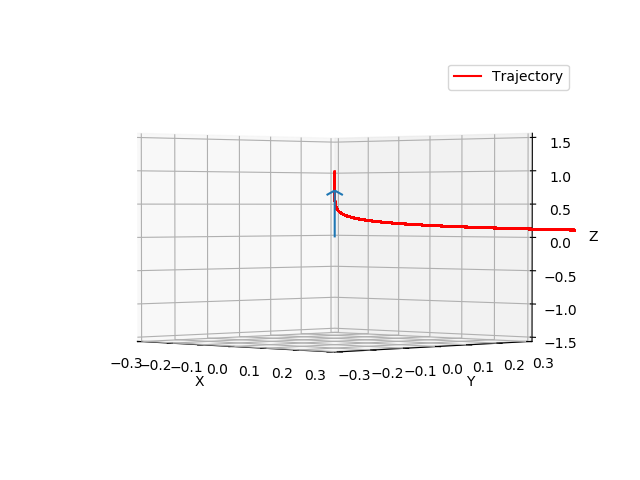

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Origin
x, y, z = (0, 0, 0)

# Directions of the vector 
u = m.vector[0, 0]  # x Component 
v = m.vector[0, 1]  # y Component
w = m.vector[0, 2]   # z Component 

quiver = ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1, color="red")
ax.plot(m.vector[:0, 0], m.vector[:0, 1], m.vector[:0, 2], color='r', label="Trajectory")

def update(t):
    global quiver
    u = m.vector[t, 0]
    v = m.vector[t, 1]
    w = m.vector[t, 2]
    quiver.remove()
    quiver= ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1)
    ax.plot(m.vector[:t, 0], m.vector[:t, 1], m.vector[:t, 2], color='r', label="Trajectory")
    
ax.set_xlim3d([-0.3, 0.3])
ax.set_xlabel('X')

ax.set_ylim3d([-0.3, 0.3])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.5, 1.5])
ax.set_zlabel('Z')

ax.view_init(elev= 0.9, azim=-45)
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200, blit= True)
ax.legend()
ani.save("magnetization.gif")
plt.show()

##### Note : the animation is interactive on Jupyter